In [1]:
import os
os.chdir("/home/pavle/Desktop/PRML/projekat")

In [2]:
#!pip install nbformat
#!pip install imbalanced-learn
#!pip install tensorflow 

In [3]:
%%capture 
%run -n abalone_project.ipynb

### CLASSIFICATION INTO 4 AGE GROUPS (Q)

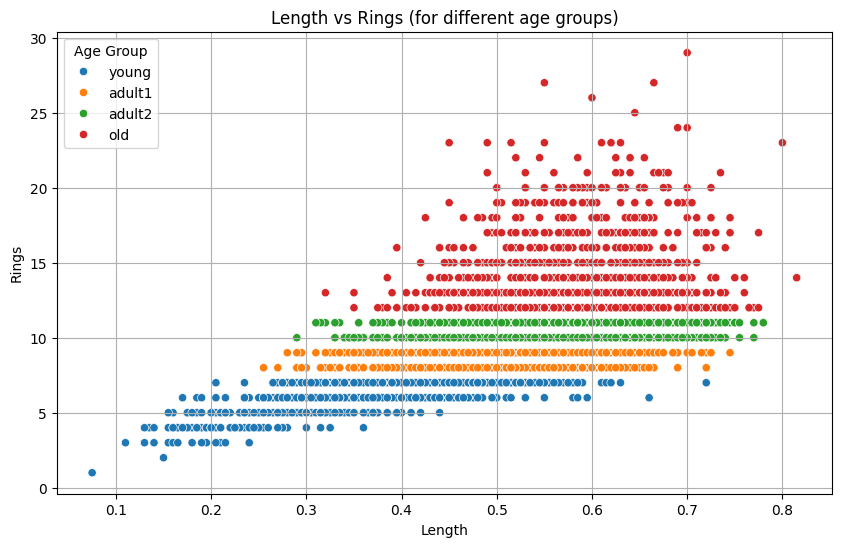

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Length', y='Rings', hue='Age group q')

plt.title('Length vs Rings (for different age groups)')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.legend(title='Age Group')
plt.grid(True)

plt.show()

In [5]:
X = data[['Length']]
y = data['Age group q']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# The function that uses kNN to calculate the pdf of x in the given sample

def pdf(x, k, sample): 
    distances = sorted([abs(x-s) for s in sample])
    dist = distances[k-1]
    vol_unit_sphere = 2
    return k / (len(sample) * vol_unit_sphere * dist)


# The function that classifies x according to kNN-pdf function and ML criteria:

def classify_point(x, k):
    pdf1 = pdf(x, k, X_train[y_train == 'young']['Length']) 
    pdf2 = pdf(x, k, X_train[y_train == 'adult1']['Length']) 
    pdf3 = pdf(x, k, X_train[y_train == 'adult2']['Length'])
    pdf4 = pdf(x, k, X_train[y_train == 'old']['Length'])

    if pdf1 == max(pdf1, pdf2, pdf3, pdf4):
        return 'young'
    elif pdf2 == max(pdf1, pdf2, pdf3, pdf4):
        return 'adult1'
    elif pdf3 == max(pdf1, pdf2, pdf3, pdf4):
        return 'adult2'
    else: 
        return 'old'

def error_of_classifier(assigned_label, true_label):
    return 0 if assigned_label == true_label else 1

# Now it's time to run the model: 

err=0
k=100
for idx, sample in enumerate(X_test['Length']):
    classified_label = classify_point(sample, k)
    true_label = y_test.iloc[idx]  
    err += error_of_classifier(classified_label, true_label)

average_error = err / len(X_test)
print(average_error) # We see that 53% of the test data gets wrongly classified

0.525748502994012


### CLASSIFICATION INTO 3 AGE GROUPS

In [6]:
# Sve to isto sa Age group (3 grupe)
# Everything is the same when we use 3 age groups

X = data[['Length']]
y = data['Age group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# The function that classifies x according to kNN-pdf function and ML criteria:


def classify_point(x, k):
    pdf1 = pdf(x, k, X_train[y_train == 'young']['Length']) 
    pdf2 = pdf(x, k, X_train[y_train == 'adult']['Length']) 
    pdf3 = pdf(x, k, X_train[y_train == 'old']['Length'])

    if pdf1 == max(pdf1, pdf2, pdf3):
        return 'young'
    elif pdf2 == max(pdf1, pdf2, pdf3):
        return 'adult'
    else: return 'old'


# The function that classifies x according to kNN-pdf function and ML criteria:

def error_of_classifier(assigned_label, true_label):
    return 0 if assigned_label == true_label else 1


# Now it's time to run the model: 

err = 0
k = 100
for idx, sample in enumerate(X_test['Length']):
    classified_label = classify_point(sample, k)
    true_label = y_test.iloc[idx]  
    err += error_of_classifier(classified_label, true_label)

average_error = err / len(X_test)
print(average_error) # 41% error

0.41437125748502995


### K-NN REGRESSION - PREDICTION IS THE MEAN OF K-NN

In [7]:
X = data[['Length']]
y = data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

def knn_regression(x, k):

    distances = np.abs(X_train['Length'] - x)
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_y_train = y_train.iloc[k_nearest_indices]
   
    prediction = k_nearest_y_train.mean()
    
    return prediction.round()

y_pred = []
k=100
for idx, sample in enumerate(X_test['Length']):
     y_pred.append(knn_regression(sample,k))

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 score:', r2, 'MAE:', mae, 'MSE:', mse)

R2 score: 0.3043208465992424 MAE: 1.8826347305389222 MSE: 6.907784431137724


In [12]:
import math

X = data.drop(columns=['Rings', 'Sex'])
y = data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

def knn_regression(x, k):

    distances = math.dist(X_train['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], x)
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_y_train = y_train.iloc[k_nearest_indices]
   
    prediction = k_nearest_y_train.mean()
    
    return prediction.round()

y_pred = []
k=100
for idx, sample in enumerate(X_test['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']):
     y_pred.append(knn_regression(sample,k))

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 score:', r2, 'MAE:', mae, 'MSE:', mse)

KeyError: ('Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight')

Now we will construct and train a neural network which will predict number of Rings based on given feature values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


2024-09-01 16:58:30.115127: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 16:58:30.243845: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 16:58:30.413555: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 16:58:30.586327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 16:58:30.645650: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 16:58:30.896456: I tensorflow/core/platform/cpu_feature_gu

In [ ]:
# We will need to encode Sex considering that its a categorical variable. For that we use one hot encoding
# We scale other variables so that each variable contributes as much as it should, not as big as it is compared to other variables
X = data.drop(columns=['Rings'])
y = data['Rings']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'])#,
        #('cat', OneHotEncoder(), ['Sex'])
    ]
)

X_processed = preprocessor.fit_transform(X)

# We are separating data into train and test because we want to more accurately assess how well the model perform and to check if it overfitted
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=1)

In [ ]:
# We are defining the model. A simple dense architecture will be used
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

I0000 00:00:1725202745.305939    5803 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-01 16:59:05.309593: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 73.1516 - mae: 7.6148 - val_loss: 13.0887 - val_mae: 2.7102
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16.6283 - mae: 2.3934 - val_loss: 6.2917 - val_mae: 1.8624
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.3956 - mae: 1.8092 - val_loss: 5.6995 - val_mae: 1.8243
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.6466 - mae: 1.6802 - val_loss: 4.8608 - val_mae: 1.5845
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3720 - mae: 1.6117 - val_loss: 4.5105 - val_mae: 1.5597
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.6135 - mae: 1.5334 - val_loss: 4.4780 - val_mae: 1.5675
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8611 - mae: 1.5923 - val_loss: 4.3573 - val_mae: 1.5080
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.6311 - mae: 1.5396 - val_loss: 4.4044 - val_mae: 1.5556
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step 

In [ ]:
# We are calculating the loss on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {test_mae:.4f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1962 - mae: 1.4941
Test Mean Absolute Error: 1.5316


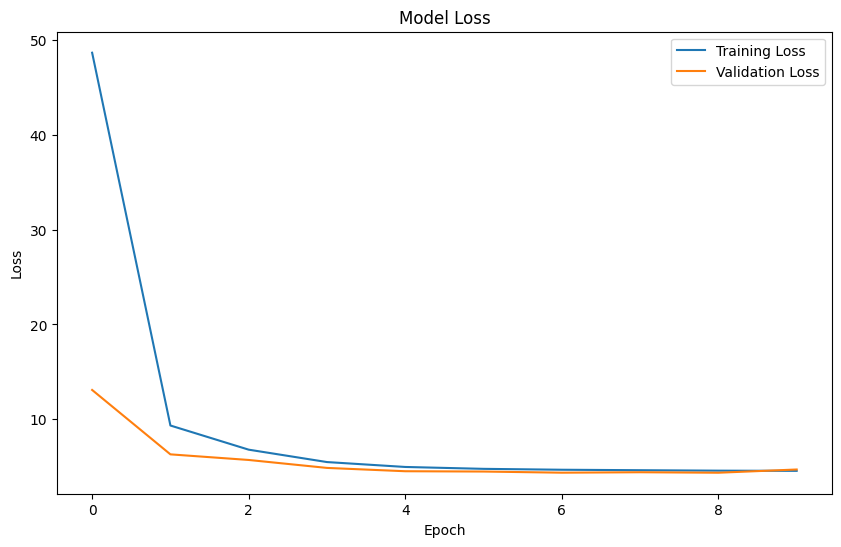

In [ ]:
import matplotlib.pyplot as plt

# Lets plot it to see whats happening
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()